# Fundamentos 5: Entrada de Datos 
# Lectura y Generación de Archivos

Como hemos visto hasta ahora, los ejemplos que hemos usado usan información que es estática, es decir, no cambia. Si queremos cambiar algún parámetro, debemos cambiarlo en el código directamente. 

Para hacer los códigos más dinámicos, debemos permitir que Python pueda interactuar con el usuario, por ejemplo a través del teclado. Esto es útil para trabajos pequeños, pero cuando se quiere analizar grandes cantidades de datos, es importante poder cargarlos en Python. Estos datos pueden estar en archivos de texto plano o tablas de Excel,   pueden provenir de un equipo de campo o laboratorio o estar en formatos específicos de cada campo de las geociencias (datos *segy* en sísmica, *miniseed* en sísmología, etc.).

Entrada y salida de datos (input-output): A través del teclado (keyboard input/output), leyendo y escribiendo archivos (file input/output), manejo de directorios y archivos en Python.


En este módulo buscamos aprender a interacutar con Python y leer y escribir series de datos. 

# Interacción con el teclado

## Geoterma Continental
En un ambiente continental, por ejemplo en un cratón, la geoterma se puede calcular siguiendo la siguiente ecuación diferencial: 
$$
\frac{\partial^2 T}{\partial z^2} = -\frac{A}{k}
$$
donde $T$ es temperatura, $z$ es profundidad, $k$ es la conductividad térmica de las rocas, y $A$ representa la generación de calor por decaimiento radioactivo. Acá se asume que la geoterma está en equilibrio (no hay cambio temporal). 

La solución en el caso de una sola capa, y con un flujo de calor del manto a una profundidad $d=50km$ es:
$$
T(z) = -\frac{Az^2}{2k} + \frac{(Qz+Ad)}{k}z
$$
donde
$$
Q(z=d) = Q_d
$$
es el flujo de calor proveniente del manto.

La siguiente función muestra la geoterma en función de la profundidad. La interación con el usuario le solicita los valores conductividad $k$ y producción de calor $A$ a través de la función `input`. 

La función `input` espera una entrada del usuario con el teclado que culmina cuando pulse el `Enter`. Tenga en cuenta la variable obtenida a través de `input` es una variable `str`, por lo que es necesario convertirla a una variable tipo `float` para que la entrada del usuario sea interpretada como un número.  


In [81]:
def geoterm(k,A,Qd=21e-3):
    """
    Calculo de la geoterma en equilibrio a 
    partir de valores de conductividad térmica,
    generación por radioactividad y gradiente de
    temperatura en la superficie. 
    T en superficie es 25C.
    
    Entradas:
    k  - conductividad térmica (W/m/C)
    A  - Generación de calor (W/m^3)
    Qd - opcional, flujo de calor del manto (W/m2)
    
    La función imprime una tabla con resultados. 

    Nota: Cuidado, profundidad maxima es 50 km,
    pero se asume que no hay difusión hasta esa profundidad. 
    """
    import numpy as np

    # prof del manto
    d = 50e3
    # T superficial
    T0 = 25
    # Profundidades
    h = np.linspace(0,50,11)
    z = h*1000
    # Temperaturas
    T = -A*z**2/(2*k) + (Qd+A*d)*z/k + T0

    return h,T


In [82]:
print('Cálculo de Gradiente Geotérmico')
k = float(input('Conductividad k(W/m/C)        (1.5-3.5) '))
A = float(input('Generación calor A(1e-6 W/m3) (0.5-4.0) '))
z,T = geoterm(k,A/1e6)
print('\n Prof.   Temp(C)')
for i in range(len(z)):
    print(f'{z[i]:6.0f}    {T[i]:6.0f}')


Cálculo de Gradiente Geotérmico


Conductividad k(W/m/C)        (1.5-3.5)  1.5
Generación calor A(1e-6 W/m3) (0.5-4.0)  2.5



 Prof.   Temp(C)
     0        25
     5       491
    10       915
    15      1298
    20      1638
    25      1937
    30      2195
    35      2411
    40      2585
    45      2718
    50      2808


## I/O de datos en Python

Para el estudio de datos en geociencias, es necesario poder leer (y guardar) archivos en formato plano (*flat file*).  En general, esto implica una tabla con datos en filas y columnas, con valores numéricos. En algunos casos, el archivo tiene un encabezado o *header* que no tiene valores numéricos, sino texto explicando que significa cada columna. 

Para archivos en otros formatos, por ejemplo datos binarios como `segy`, `mseed` o cualquier otro formato propio de cada subcampo de las geociencias, es necesario utilizar herramientas adicionales o paquetes que sepan como leer dichos formatos. 


## Comparación de geotermas

El archivo `geoterm.dat` tiene una serie de datos organizados así
```
k(W/m/C)    A(W/m3)    Qd (W/m2)  
  2.5      1.25e-6      21e-3
  1.5      1.25e-6      21e-3
  2.5      3.00e-6      21e-3
  2.5      1.25e-6      42e-3
```
de tal forma que cada línea representa diferentes valores de conductividad, generación de calor y flujo basal (a $d=50 km$ de profundidad). El objetivo es comparar los resultados de los 4 modelos propuestos. 


Filas y columnas datos  (4, 3)


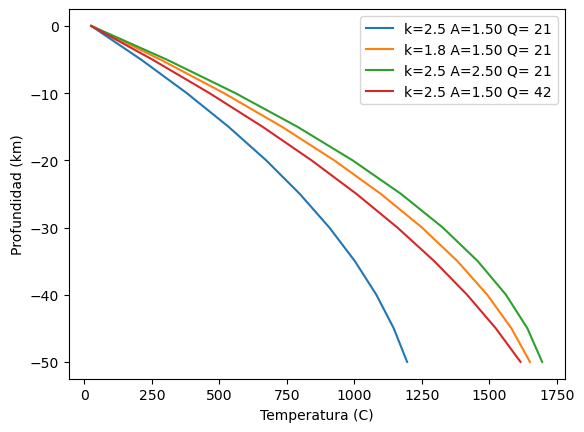

In [107]:
import numpy as np
import matplotlib.pyplot as plt

# nombre del archivo
fname = 'geoterm.dat'

# Cargue el archivo
data = np.loadtxt(fname,skiprows=1)
#Número de files
nmod = np.shape(data)[0]
print('Filas y columnas datos ',np.shape(data))

# Cálculo de geoterma y gráfica
for i in range(nmod):
    k = data[i,0]
    A = data[i,1]
    Q = data[i,2]
    z,T = geoterm(k,A,Q)
    leg = f'k={k:3.1f} A={A*1e6:4.2f} Q={Q*1e3:3.0f}'
    plt.plot(T,-z,label=leg)
plt.legend()
plt.xlabel('Temperatura (C)')
plt.ylabel('Profundidad (km)')
plt.show()



**Por ahora, olvidemos la parte relacionada con la generación de la figura.**

Para leer el archivo, simplemente se tiene que solicitar a `numpy` que lo lea
```
data = np.loadtxt(fname,skiprows=1)
```
donde intencionalmente saltamos la primera linea (`skiprows`) para evitar leer el nombre de cada columna. Tenga en cuenta que `numpy` espera arreglos de un mismo tipo y por lo tanto no espera combinar en una matriz números y caracteres. 

Una vez leído, la variable `data` es un arreglo de numpy con 4 filas y 3 columnas. Numpy automáticamente asigna el tamaño de `data` sin necesidad de que Ud sepa cuantos datos hay. 

**Precaución**. Numpy asume que el archivo está organizado en columnas, separadas por espacios y que todas las columnas estan ocupadas con valores numéricos, tienen la misma longitud y no tienen valores vacíos.  

In [108]:
print(type(data))
print(np.shape(data))

<class 'numpy.ndarray'>
(4, 3)


El comando `np.loadtxt` tiene una gran variedad de opciones para leer los archivos (digite `help(np.loadtxt`) en Python para ver la documentación). El formato general de la función tiene muchas opciones, acá sólo muestro algunas de ellas
```
loadtxt(fname, dtype='float', comments='#', 
        delimiter=',', skiprows=1, usecols=[0,2])
```
donde se le ordena a `loadtxt` leer los datos como `float`, lineas con comentarios se marcan como `#` y no son leídas, las columnas están separadas por comas (típico de archivos `.csv`), se salta una línea que puede ser el encabezado y sólo se leen la primera y tercera columna. Note que todos los comandos (a excepción del nombre del archivo son opcionales) y Python asume algunos valores. Por ejemplo, las columnas por defecto están separadas por espacios, y los valores se asumen como `float`. 


## Archivos planos más complejos

Existen archivos más complejos que requieren de mayor trabajo para leerlos. Un ejemplo es un archivo que contiene los nombres de estaciones sismológicas en el año 2014 para la red **1B**, una red de sensores muy densa ubicada cerca de Sweetwater, Texas. Los datos fueron descargados de la página de SAGE (Seismological Facility for the Advancement of Geoscience). 

El archivo tiene el siguiente formato
```
#Net | Sta | Lat | Lon | Elev | SiteName | StartTime | EndTime 
1B|5R536|32.748402|-100.535698|634.7|207536|2014-01-01T00:00:00.0000|2014-12-12T23:59:59.0000
...
```
donde las diferentes columnas están separadas por el símbolo |. Intentar leerlo con `np.loadtxt` genera un error, porque la primera columna no es numérica, que es lo que espera la función, y la columna que contiene la fecha tiene números y símbolos. 

Aunque `Numpy` tiene una función que en principio puede leer este tipo de archivos (`np.genfromtxt()`), en este ejemplo vamos a leerlo con `Pandas`. Este paquete tiene la capacidad de leer archivos planos, mixtos (caracteres y números) e incluso archivos de Excel y Matlab. 

**Son mas de 2000 estaciones en un área de 10x10 km**


Estructura de Pandas
<class 'pandas.core.frame.DataFrame'>
     #Network   Station    Latitude    Longitude    Elevation    SiteName    
0           1B     5R536   32.748402  -100.535698        634.7      207536  \
1           1B     5R539   32.748901  -100.535797        637.0      207539   
2           1B     5R542   32.749500  -100.536003        635.5      207542   
3           1B     5R545   32.750099  -100.536201        632.1      207545   
4           1B     5R548   32.750702  -100.536301        628.8      207548   
...        ...       ...         ...          ...          ...         ...   
2263        1B     79632   32.778702  -100.484703        607.7      261632   
2264        1B     79635   32.779301  -100.484901        606.5      261635   
2265        1B     79638   32.779900  -100.485001        605.7      261638   
2266        1B     79641   32.780499  -100.485199        604.6      261641   
2267        1B     79644   32.781101  -100.485397        603.9      261644   

    

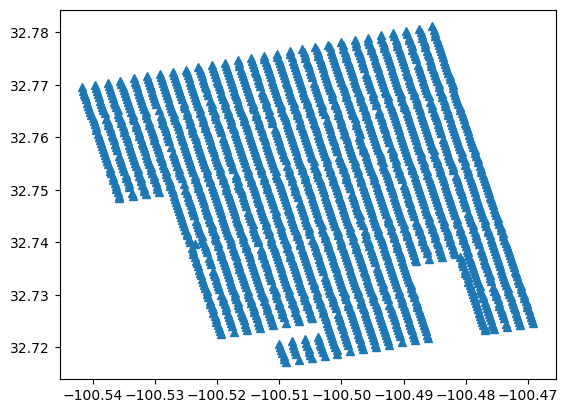

In [112]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

fname = 'station.dat'
data = pd.read_csv(fname, sep='|')
print('Estructura de Pandas')
print(type(data))
print(data)

# Extraer columnas a numpy
sta = data.iloc[:,1].to_numpy()
lat = data.iloc[:,2].to_numpy()
lon = data.iloc[:,3].to_numpy()

print('Número total de estaciones ', )
plt.plot(lon,lat,'^')


El paquete Pandas es importado con:
```
import pandas as pd
```
y carga los datos con el comando
```
data = pd.read_csv(fname, sep='|')
```
donde se le indica que el separador entre columnas no es una coma sino el símbolo `|`. Pandas tiene su propio tipo de estructura (llamado  `DataFrame`) que son una especie de arreglos de matrices, pero que pueden tener diferentes tipos de elementos (str, int, float, etc). Note que el `Dataframe` organiza los datos en columnas y filas numeradas.

Para convertir alguna columna del dataframe `data`  a un arreglo de Numpy: 
```
sta = data.iloc[:,1].to_numpy()
lat = data.iloc[:,2].to_numpy()
```



## Guardar archivos
En muchos casos, es importante poder leer archivos, pero también es importante poder guardar los resultados de un análisis, de procesamiento o resultados de simulaciones y cálculos, sin la necesidad de repetir el procesamiento cada vez que se quiera revisar los resultados. 

Aunque las gráficas son una forma de presentar resultados, no permiten mirar los datos brutos que siempre es bueno tenerlos para poder replicar trabajos de investigación.

Repetimos el trabajo de la comparación de geotermas continentales que realizamos arriba, pero ahora guardamos los resultados de todos los modelos en un archivo, cuyas columnas continene la profundidad, y las temperaturas de los 4 modelos estudiados. 

Tal como podría esperarse, el comando de Numpy es `np.savetxt`. Los datos que deseamos guardar deben estar organizados en una matriz (un arreglo). El formato de cada columna se puede especificar. 




In [121]:
import numpy as np
import matplotlib.pyplot as plt

# nombre del archivo
fname = 'geoterm.dat'
# nombre archivo de salida
fout  = 'Tz.dat'

# Cargue el archivo
data = np.loadtxt(fname,skiprows=1)
nmod = np.shape(data)[0]

# Cálculo de geoterma, creación matriz
for i in range(nmod):
    k = data[i,0]
    A = data[i,1]
    Q = data[i,2]
    z,T = geoterm(k,A,Q)
    if (i==0):
        ndep = len(z)
        Tmatrix = np.zeros((ndep,nmod+1))
        Tmatrix[:,0] = z
    Tmatrix[:,i+1] = T

# Guardar datos, con formato específico
np.savetxt(fout,Tmatrix,fmt='%4.0f %8.1f %8.1f %8.1f %8.1f')



El archivo de salida tiene el siguiente formato
```
   0     25.0     25.0     25.0     25.0
   5    209.5    281.2    304.5    251.5
  10    379.0    516.7    559.0    463.0
...
```



## I/O veloz en Python
En computación, los cálculos y operaciones matemáticas están optimizadas dentro de los programas, por lo que en muchos casos el tiempo computacional se consume en procesos I/O (input/output), leer y guardar archivos. Para realizar los procesos I/O con mayor rapidez, en muchos casos es mejor guardar los archivos en formato binario, en vez de guardarlos como archivos de texto plano. 

Suponga que tenemos una matriz grande (`A`) que queremos guardar. Existen (por lo menos) tres opciones:
- guardar el archivo en formato de texto plano (`np.savetxt(A)`)
- guardar en archivo binario de Python (`A.tofile`)
- guardar en archivo binario de Numpy (`np.save(A)`)
Abajo mostramos la forma de guardar el archivo y la forma de volver a leerlo, cronometrando el tiempo que toma al computador. 



In [124]:
import numpy as np
import time

# tamaño de matriz
m= 100000
n= 10
A = np.ones((m,n))*1.1

# Guardar datos
f1 = 'testio.bin'
f2 = "testio.npy"
f3 = "testio.dat"
print('Tiempo requerido para guardar')

# formato binario
start = time.time()
a.tofile(f1)
print ('Binario: %8.5f segundos.' %(time.time()-start))

# formato Numpy nativo (binario)
start = time.time()
np.save(f2, a)
print ('Numpy:   %8.5f segundos.' %(time.time()-start))

# formato plano de texto
start = time.time()

np.savetxt(f3, a)
print ('Texto:   %8.5f segundos.' %(time.time()-start))

# Cargar datos
print('')
print('Tiempo requerido para cargar')

# formato binario
start = time.time()
b1 = np.fromfile(f1,dtype='float')
b1 = b1.reshape(m,n)
print ('Binario: %8.5f segundos.' %(time.time()-start))

# formato Numpy nativo (binario)
start = time.time()
b2 = np.load(f2)
print ('Numpy:   %8.5f segundos.' %(time.time()-start))

# formato plano de texto
start = time.time()
b3 = np.loadtxt(f3)
print ('Texto:   %8.5f segundos.' %(time.time()-start))


Tiempo requerido para guardar
Binario:  0.00554 segundos.
Numpy:    0.00248 segundos.
Texto:    0.54316 segundos.

Tiempo requerido para cargar
Binario:  0.00130 segundos.
Numpy:    0.00235 segundos.
Texto:    0.22971 segundos.


Note como usando archivos de texto, la lectura puede ser muy demorada. El factor de velocidad es de 55 veces menor comparado con los formatos binarios. El tamaño de los archivos resultantes es además muy distinto:
```
7.6M  testio.bin
7.6M  testio.npy
24M   testio.dat
```
Note que el archivo en el formato nativo de Python `.npy` ocupa el mismo espacio que un binario normal, pero el archivo binario no `sabe` que el archivo es una matriz, sino que guarda la matriz plana, sin tamaños predefinidos, y toca reorganizarla. 


## Mejores formatos binarios
En algunos casos, el usuario puede querer guardar varios arreglos en un sólo archivo, manteniendo la información de las dimensiones de los arreglos. Esto se puede hacer en archivos `npz`, con el comando:
```
np.savez(outfile, x, y)
```
donde se guardan los arreglos `x` y `y`, los cuales después se pueden cargar con
```
npzfile = np.load(outfile)
```
Note que Numpy lee el archivo dependiendo si es `npy` o `npz`. El siguiente programa guarda un **único** archivo binario en formato `.npz`, y lo vuelve a leer, sin perder información. El archivo guarda variables, arreglos, etc., y les puede poner un *nombre* a cada uno, para así hacer más fácil su lectura. 

In [128]:
import numpy as np

m= 100000
n= 10
A = np.ones((m,n))*1.1
y = np.random.rand(n)
x = np.random.rand(m)
z = 1.5

print('Variables guardadas')
print('Shape de A, x, y, size(z)')
print(np.shape(A),np.shape(x),np.shape(y),np.size(z))
print('')

# Guardar en formato npz numpy
f2 = "testio2.npz"
np.savez(f2, A=A,x=x,y=y,m=m,n=n,z=z)

# Cargar archivos, confirmar tamaños
npfile = np.load(f2)

print('Las variables dentro del archivo')
print(npfile.files)

# Extraiga las variables
n  = npfile.f.n
m  = npfile.f.m
x0 = npfile.f.x
y0 = npfile.f.y
A0 = npfile.f.A
z0 = npfile.f.z

print('Variables cargadas')
print('Shape de A, x, y, size(z)')
print(np.shape(A0),np.shape(x0),np.shape(y0),np.size(z0))
print('')




Variables guardadas
Shape de A, x, y, size(z)
(100000, 10) (100000,) (10,) 1

Las variables dentro del archivo
['A', 'x', 'y', 'm', 'n', 'z']
Variables cargadas
Shape de A, x, y, size(z)
(100000, 10) (100000,) (10,) 1



Es importante notar que se pueden guardar un número indefinido de arreglos o variables, en un formato eficiente (rápido) y con bajo consumo de memoria. El archivo ocupa apenas 8.4Mb. La gran ventaja es que el programa puede guardar varios arreglos y al cargarlos, mantiene la información de cada arreglo (su tamaño y shape) y si se quiere el nombre de las variables. 

Al guardar el archivo, es opcional si se le quiere poner el nombre a cada variable. Si por ejemplo usamos
```
np.savez(fname, A,x,y,m,n,z)
```
al cargarlo cada variable recibe un nombre
```
['arr_1', 'arr_0', 'arr_3', 'arr_2', 'arr_4']
```
de acuerdo al orden en que fueron guardados (`A, x, y, m, n, z`). En este caso, la dificultad es que uno debe saber el orden en el que fue guardada cada variable.


## Archivos de texto vs Binarios

Como se ve en este módulo, hay un *tradeoff* (compensación o sacrificio) entre trabajar con archivos de texto o binarios. Los archivos de texto plano son más fáciles de trabajar, se pueden cargar en Excel o matlab con facilidad e incluso se puede abrir el archivo y mirar los datos. Es el método sugerido cuando el tamaño del archivo o velocidad de los cálculos no son un problema. 

Sin embargo, para bases de datos muy grandes y procesamiento de datos pesados, es mejor usar formatos binarios por que permite transferencia I/O rápido y ocupando menos memoria en el computador (un problema cada vez menos importante claro está). De hecho Excel muchas veces se vara cuando tiene que procesar bases de datos *no tan* grandes. Adicionalmente, en el formato binario, no se tiene que decidir de antemano el formato (y la precisión que se quiere guardar los números; ¿cuántos decimales quiero guardar?). Los archivos binarios son menos portátiles y se requiere conocer en muchos casos el formato del archivo para poder leerlo. 
